In [286]:
import pandas as pd
from skimpy import skim
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [287]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [288]:
alcohol_sales = pd.read_csv(
    'data/Alcohol_Sales.csv',
    parse_dates=['DATE'],
    dtype={"S4248SM144NCEN":int}
)

alcohol_sales.columns = ["ds","y"]

In [289]:
skim(alcohol_sales)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 325    │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ y                │    0 │      0 │   7886 │   2914 │   3031 │   5231 │   7481 │   9977 │   15500 │ ▇▇▆▇▃▁  │  │
│ └──────────────────┴──────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴─────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ ds                     │      0 │         0 │     1992-01-01      │     2019-01-01      │ MS               │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

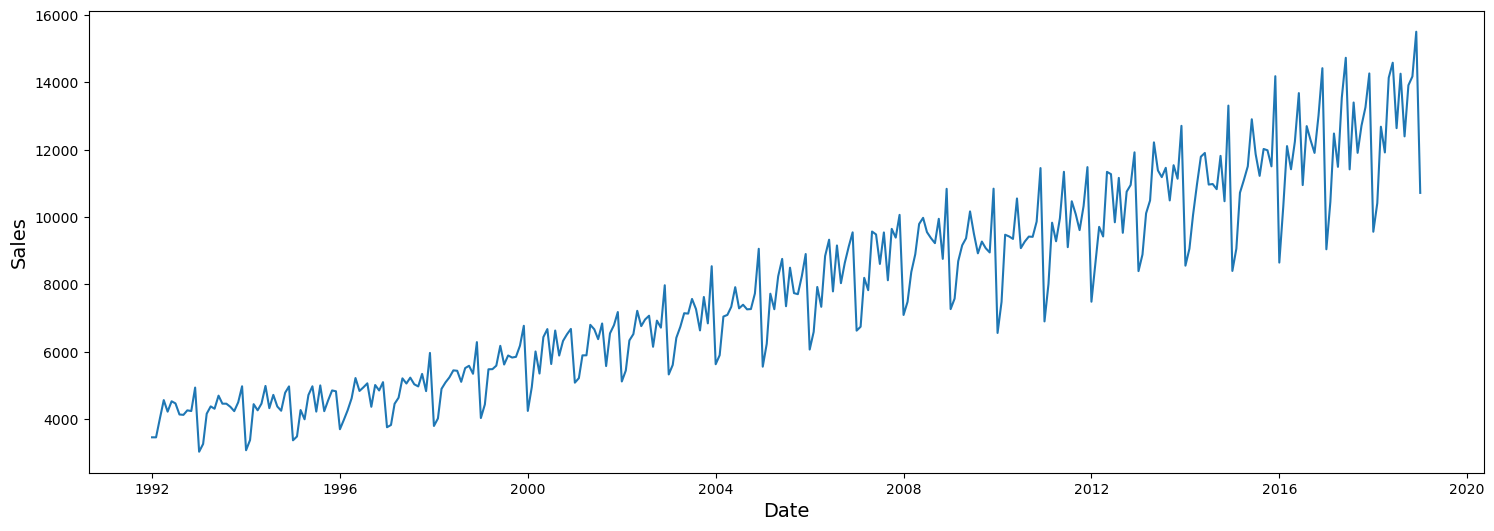

In [351]:
plt.figure(figsize=(18,6))
plt.plot(alcohol_sales["ds"],alcohol_sales["y"])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [291]:
TRAIN_SIZE = 0.6
index_split = int(len(alcohol_sales)*TRAIN_SIZE)
train = alcohol_sales.iloc[:index_split]
test = alcohol_sales.iloc[index_split:]

In [292]:
train.shape, test.shape

((195, 2), (130, 2))

In [346]:
m = Prophet()

In [347]:
m.fit(train)

18:39:30 - cmdstanpy - INFO - Chain [1] start processing
18:39:30 - cmdstanpy - INFO - Chain [1] done processing


In [342]:
FUTURE_PERIOD = 130

In [343]:
future = m.make_future_dataframe(periods=len(test)+FUTURE_PERIOD, freq='M')
forecast = m.predict(future)


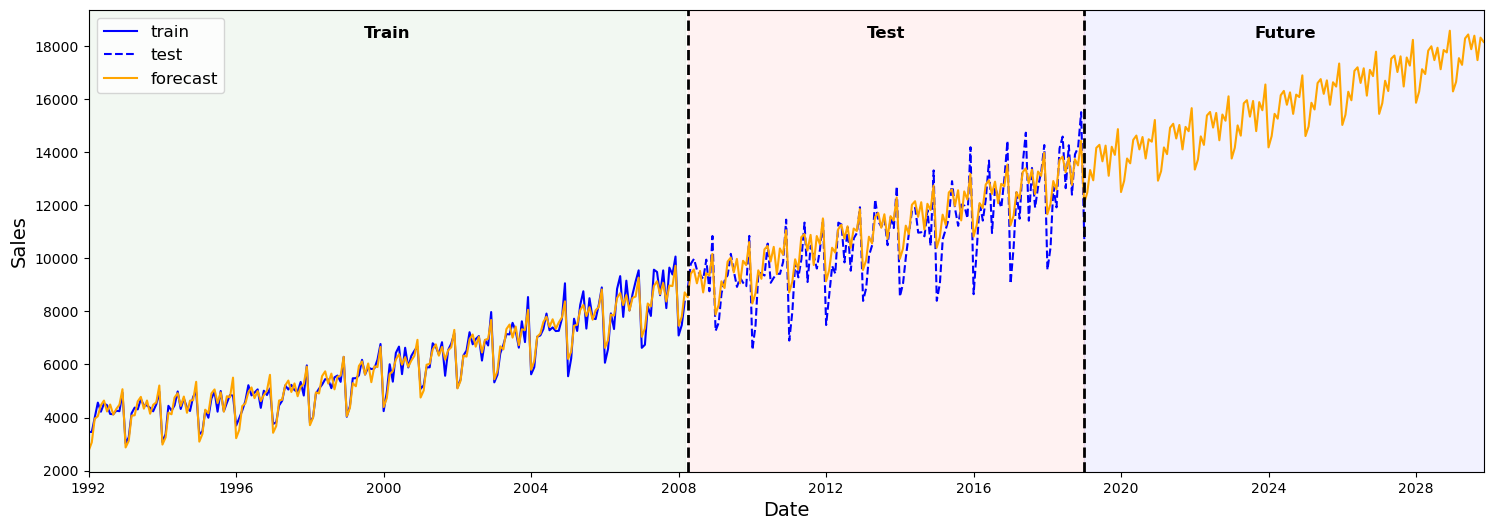

In [344]:
plt.figure(figsize=(18,6))
plt.plot(train['ds'],train['y'], color='blue', label='train')
plt.plot(test['ds'],test['y'], color='blue',linestyle='--',label='test')
plt.plot(forecast['ds'],forecast['yhat'], color="orange",label='forecast')

plt.axvspan(train['ds'].min(), train['ds'].max(), color='green', alpha=5e-2)
plt.axvspan(test['ds'].min(), test['ds'].max(), color='red', alpha=5e-2)
plt.axvspan(test['ds'].max(), forecast['ds'].max(), color='blue', alpha=5e-2)
plt.axvline(test['ds'].min(), color='black', linestyle='--',linewidth=2)
plt.axvline(test['ds'].max(), color='black', linestyle='--',linewidth=2)

y_text = forecast.yhat.max()*0.98
plt.text(train['ds'].mean(),y_text, 'Train', ha='center', va='bottom', fontweight='bold')
plt.text(test['ds'].mean(), y_text, 'Test', ha='center', va='bottom', fontweight='bold')
plt.text(forecast['ds'].iloc[-len(test):].mean(), y_text, 'Future', ha='center', va='bottom', fontweight='bold')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xlim(train['ds'].min(), forecast['ds'].max())
plt.show()